**Cargar los datos**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

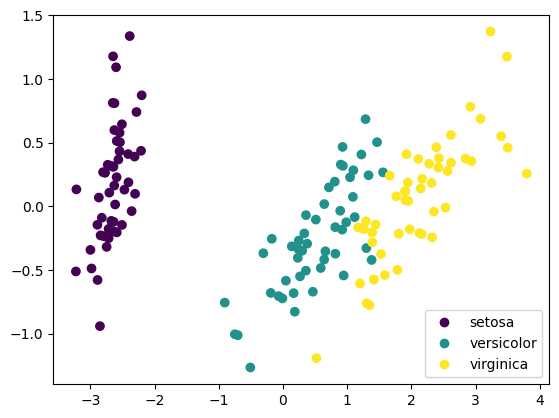

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

fig = plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.legend(fig.legend_elements()[0], iris.target_names);

**Particionar los datos**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_r,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=40,
                                                    stratify=y)

**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel, C=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Kernel: ", kernel)
    print(classification_report(y_test, y_pred))

Kernel:  linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Kernel:  rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Kernel:  poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.8

**Límites de decisión**

f1_score using linear: 0.9777530589543938


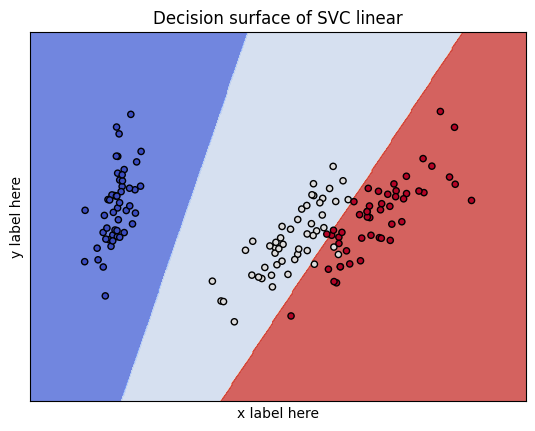

f1_score using rbf: 0.9777530589543938


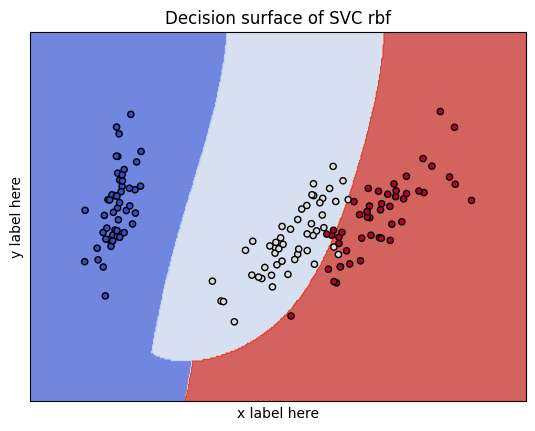

f1_score using poly: 0.9553571428571429


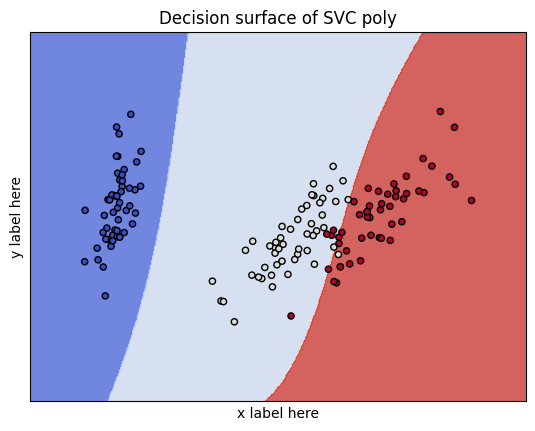

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel, C=5) #variar parámetro de regularización C
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("f1_score using {}:".format(kernel), f1_score(y_test, y_pred, average='macro'))

    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of SVC ' + model.kernel)
    # Set-up grid for plotting.
    X0, X1 = X_r[:, 0], X_r[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

**Referencias**
* SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html